<a href="https://colab.research.google.com/github/sharjeelmajeed/Elevvo-Data-Analytics-Internship-Tasks/blob/main/Task_05/(SQL_based_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files

uploaded = files.upload()


Saving Chinook_Sqlite.sqlite to Chinook_Sqlite.sqlite


In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


conn = sqlite3.connect("Chinook_Sqlite.sqlite")


In [6]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
tables


,name
0,Album
1,Artist
2,Customer
3,Employee
4,Genre
5,Invoice
6,InvoiceLine
7,MediaType
8,Playlist
9,PlaylistTrack


In [7]:
plt.figure(figsize=(10,6))
plt.bar(df_top_customers["FirstName"], df_top_customers["TotalSpent"])
plt.xticks(rotation=45)
plt.title("Top 10 Customers by Spending")
plt.ylabel("Total Spent ($)")
plt.tight_layout()

plt.savefig("1st-visualization.png")
plt.show()



NameError: name 'df_top_customers' is not defined

<Figure size 1000x600 with 0 Axes>

In [8]:
query = """
SELECT c.Country, SUM(il.UnitPrice * il.Quantity) AS TotalSales
FROM InvoiceLine il
JOIN Invoice i ON il.InvoiceId = i.InvoiceId
JOIN Customer c ON i.CustomerId = c.CustomerId
GROUP BY c.Country
ORDER BY TotalSales DESC;
"""
df_country_sales = pd.read_sql_query(query, conn)
df_country_sales


,Country,TotalSales
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


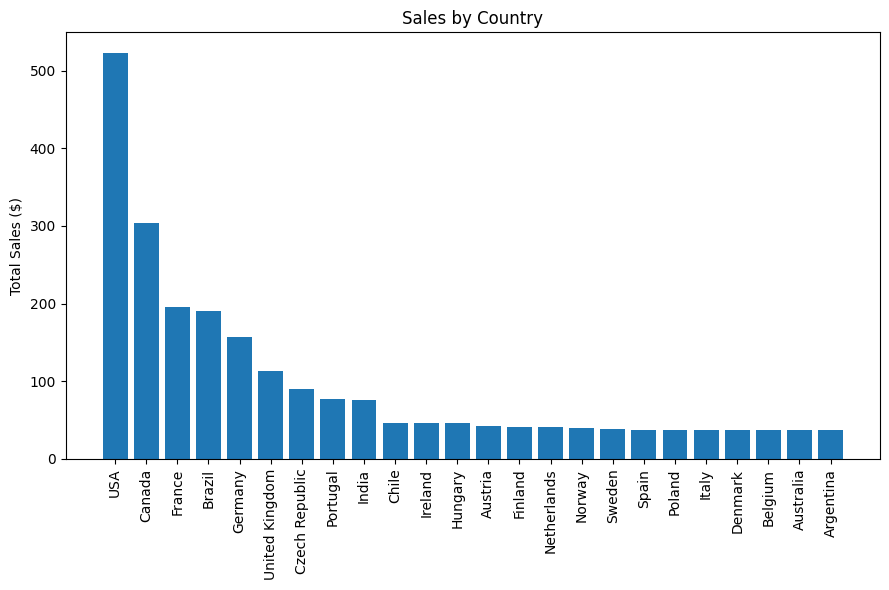

In [10]:
plt.figure(figsize=(9,6))
plt.bar(df_country_sales["Country"], df_country_sales["TotalSales"])
plt.xticks(rotation=90)
plt.title("Sales by Country")
plt.ylabel("Total Sales ($)")
plt.tight_layout()
plt.savefig("sales_by_country.png")

plt.savefig("2nd-visualization.png")

plt.show()


In [11]:
query = """
SELECT t.Name AS Track, SUM(il.Quantity) AS TotalSold
FROM InvoiceLine il
JOIN Track t ON il.TrackId = t.TrackId
GROUP BY t.TrackId
ORDER BY TotalSold DESC
LIMIT 10;
"""
df_top_tracks = pd.read_sql_query(query, conn)
df_top_tracks


,Track,TotalSold
0,Balls to the Wall,2
1,Inject The Venom,2
2,Snowballed,2
3,Overdose,2
4,Deuces Are Wild,2
5,Not The Doctor,2
6,Por Causa De Você,2
7,Welcome Home (Sanitarium),2
8,Snowblind,2
9,Cornucopia,2


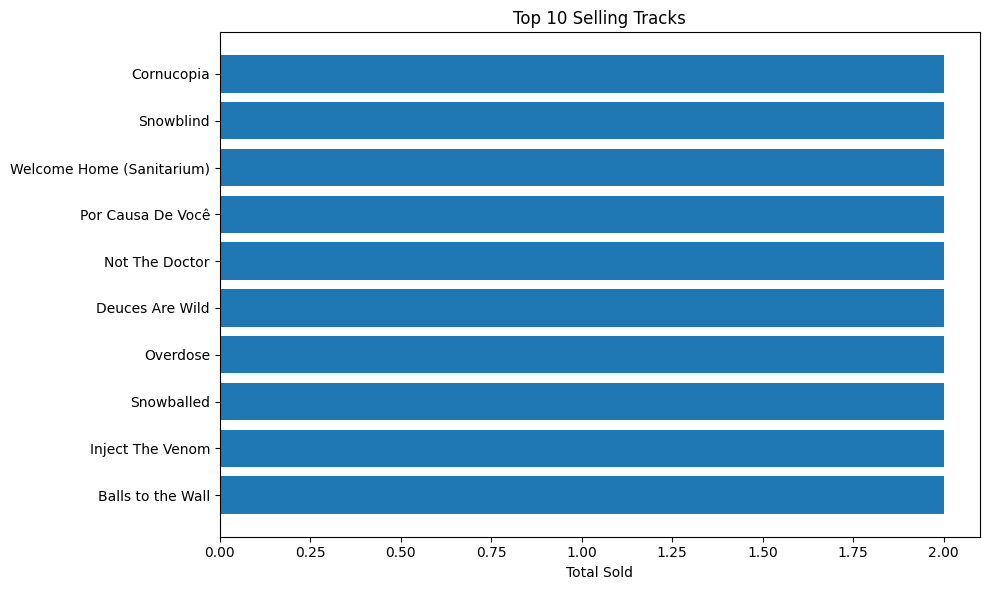

In [12]:
plt.figure(figsize=(10,6))
plt.barh(df_top_tracks["Track"], df_top_tracks["TotalSold"])
plt.title("Top 10 Selling Tracks")
plt.xlabel("Total Sold")
plt.tight_layout()
plt.savefig("top_tracks.png")

plt.savefig("3rd-visualization.png")

plt.show()


In [13]:
query = """
SELECT g.Name AS Genre, SUM(il.UnitPrice * il.Quantity) AS Revenue
FROM InvoiceLine il
JOIN Track t ON il.TrackId = t.TrackId
JOIN Genre g ON t.GenreId = g.GenreId
GROUP BY g.GenreId
ORDER BY Revenue DESC;
"""
df_genre_revenue = pd.read_sql_query(query, conn)
df_genre_revenue


,Genre,Revenue
0,Rock,826.65
1,Latin,382.14
2,Metal,261.36
3,Alternative & Punk,241.56
4,TV Shows,93.53
5,Jazz,79.20
6,Blues,60.39
7,Drama,57.71
8,Classical,40.59
9,R&B/Soul,40.59


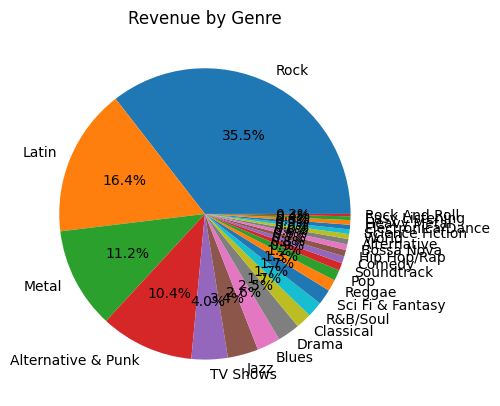

In [14]:
plt.figure(figsize=(5,5))
plt.pie(df_genre_revenue["Revenue"], labels=df_genre_revenue["Genre"], autopct='%1.1f%%')
plt.title("Revenue by Genre")
plt.tight_layout()
plt.savefig("revenue_by_genre.png")

plt.savefig("4th-visualization.png")
plt.show()


In [15]:
query = """
SELECT strftime('%Y-%m', i.InvoiceDate) AS Month,
       SUM(il.UnitPrice * il.Quantity) AS Revenue
FROM InvoiceLine il
JOIN Invoice i ON il.InvoiceId = i.InvoiceId
GROUP BY Month
ORDER BY Month;
"""
df_monthly_revenue = pd.read_sql_query(query, conn)
df_monthly_revenue


,Month,Revenue
0,2009-01,35.64
1,2009-02,37.62
2,2009-03,37.62
3,2009-04,37.62
4,2009-05,37.62
5,2009-06,37.62
6,2009-07,37.62
7,2009-08,37.62
8,2009-09,37.62
9,2009-10,37.62


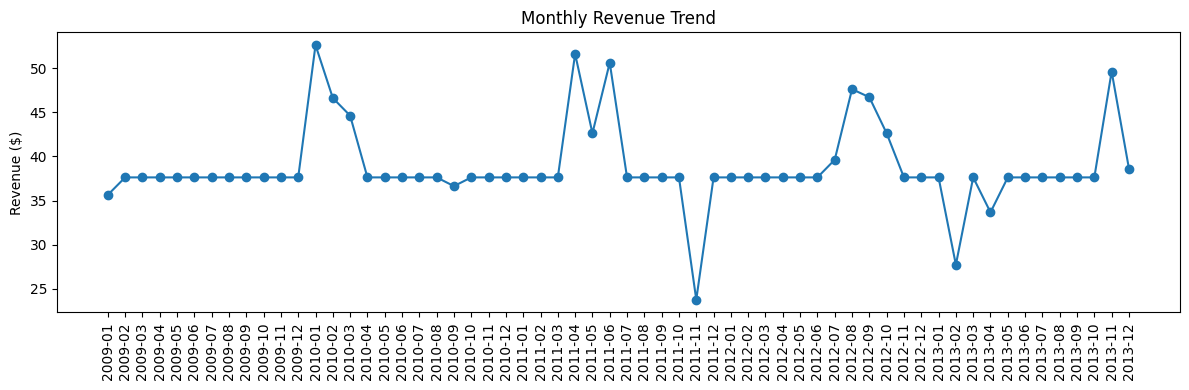

In [22]:
plt.figure(figsize=(12,4))
plt.plot(df_monthly_revenue["Month"], df_monthly_revenue["Revenue"], marker="o")
plt.xticks(rotation=90)
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig("monthly_revenue.png")

plt.savefig("5th-visualization.png")

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

save_path = "/content/drive/MyDrive/Task_5_SQL_Analysis"
os.makedirs(save_path, exist_ok=True)
